# loader

## loader.load

Loads data from a .csv file.

In [11]:
from chartpeer.loader import load

# load full OHLC candles
ohlc = load.ohlcFromFile('XBTUSD_1440.csv')
print('ohlc', ohlc)

# ohlc data can always be converted to closed prices
closed_from_ohlc = load.closedFromOhlc(ohlc)

# or directly load close prices only
data = load.closedFromFile('XBTUSD_1440.csv')
print(data)

ohlc [[1381017600, 122.0, 122.0, 122.0, 122.0, 0.1, 1], [1381104000, 123.61, 123.61, 123.61, 123.61, 0.1, 1], [1381190400, 123.91, 124.19, 123.9, 124.18, 3.9916, 4], [1381276800, 124.01687, 124.01687, 123.84, 123.84, 2.823, 3], [1381363200, 125.85, 125.86, 125.85, 125.86, 2.0, 2], [1381536000, 127.5, 127.5, 127.0, 127.0, 4.0, 3], [1381622400, 131.8408, 131.8408, 131.8408, 131.8408, 0.1, 1], [1381708800, 134.8, 135.59, 133.36726, 135.59, 12.00575337, 11], [1381795200, 135.8, 153.0, 133.87975, 133.87975, 4.3, 5], [1381881600, 143.0, 146.14, 137.63758, 138.09, 20.229, 17], [1381968000, 137.62448, 144.73, 137.52, 143.79522, 5.777, 6], [1382054400, 146.2399, 153.80147, 146.2399, 149.04856, 23.551, 23], [1382140800, 157.74, 171.25, 157.64, 165.56, 72.545, 66], [1382227200, 166.52626, 166.52626, 162.981, 162.981, 4.84841803, 5], [1382313600, 165.0, 176.65277, 165.0, 176.32429, 18.30269, 19], [1382400000, 181.97, 194.2, 150.0, 150.0, 7.37587686, 7], [1382486400, 191.62198, 203.45, 185.90287, 2

## loader.krakenApi

Downloads crypto data from public kraken endpoint. Note: too many request per time will lead to a timeout. Checkout all [kraken symbols and tickers](https://support.kraken.com/hc/en-us/articles/360000920306-API-symbols-and-tickers).

In [ ]:
from chartpeer.loader import krakenApi

# request latest OHLC data and convert to closed prices
ohlc = krakenApi.ohlc('BTC', 60)
closed = load.closedFromOhlc(ohlc)[-365:]

## loader.alphaVantage

Downloads stock OHLC data. Claim your API key [here](https://www.alphavantage.co/support/#api-key), it takes literally a minute.

In [14]:
from chartpeer.loader import alphaVantage

# instantiate 
av = alphaVantage('YOUR_API_KEY_HERE')
# find the symbol to a company
symbols = av.findSymbol('Walmart')
walmart = symbols[1]['1. symbol'] # extract the WMT symbol traded in US
# reuqest OHLC data
ohlc = av.getStockData(walmart, interval=60)
print(ohlc)

[['2023-06-30 04:00:00', 153.87, 154.28, 153.87, 154.28, 7.0], ['2023-06-30 07:00:00', 154.27, 154.69, 154.27, 154.63, 681.0], ['2023-06-30 08:00:00', 154.34, 155.0, 153.201, 154.44, 520.0], ['2023-06-30 09:00:00', 154.69, 156.26, 154.3, 156.14, 718275.0], ['2023-06-30 10:00:00', 156.15, 156.54, 155.71, 156.22, 756117.0], ['2023-06-30 11:00:00', 156.23, 156.59, 155.96, 156.05, 462687.0], ['2023-06-30 12:00:00', 156.045, 156.749, 155.93, 156.565, 323686.0], ['2023-06-30 13:00:00', 156.555, 156.9, 156.485, 156.69, 411581.0], ['2023-06-30 14:00:00', 156.685, 157.37, 156.644, 157.31, 660183.0], ['2023-06-30 15:00:00', 157.32, 157.53, 157.16, 157.18, 1282253.0], ['2023-06-30 16:00:00', 157.19, 157.5, 156.36, 157.0, 4251705.0], ['2023-06-30 17:00:00', 157.1, 157.21, 157.0, 157.11, 55698.0], ['2023-06-30 18:00:00', 157.3, 157.49, 157.11, 157.11, 1287514.0], ['2023-06-30 19:00:00', 157.18, 157.45, 157.0, 157.45, 1285262.0], ['2023-07-03 04:00:00', 157.45, 157.52, 157.15, 157.5, 511.0], ['2023-

It is useful to use the loader for converting to closed data

In [15]:
stock_data_closed = load.closedFromOhlc(ohlc)

# extrapolate

In [3]:
from chartpeer.loader import load
from chartpeer.analysis import *

# load bitcoin daily data (1440 minutes = 24h interval)
data = load.closedFromFile('XBTUSD_1440.csv')

# get 365 recent days of bitcoin closed prices
fade = 450
yearDataset = data[-365-fade:-fade]

# split the the year in 11 months and one additional "continuation" month
# this helps to compare the prediction to real data
testSet = yearDataset[:335]
continuation = yearDataset[335:365]

## extrapolate.hw

Holt Winters algorithm for seasonal prediction with smoothing parameters $\alpha,\beta,\gamma$.
In the method the parameters are fitted by hand (see example below) and can then used persistently for further predictions.

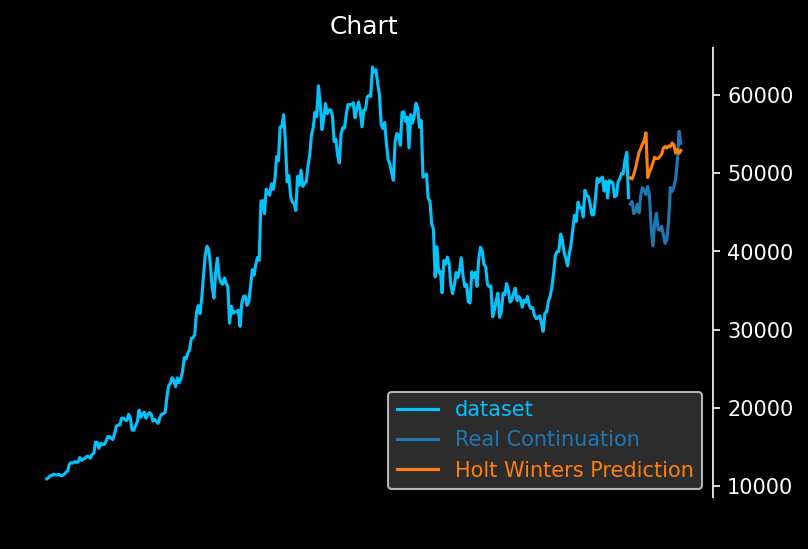

In [45]:


# perform holt winters prediction for 30 days
from chartpeer.extrapolate import hw
prediction = hw(testSet, 30, 0.22, 0.125, 0.125, periodInIntervals=30)

# plot the result for comparison
plot.chart(testSet, predictionSets = {
    'Real Continuation': continuation,
    'Holt Winters Prediction': prediction
})

In the second example the autotuner `hw_fit` is used to fit the parameters using the test set only, and will return an injectable tuple `[alpha, beta, gamma]`

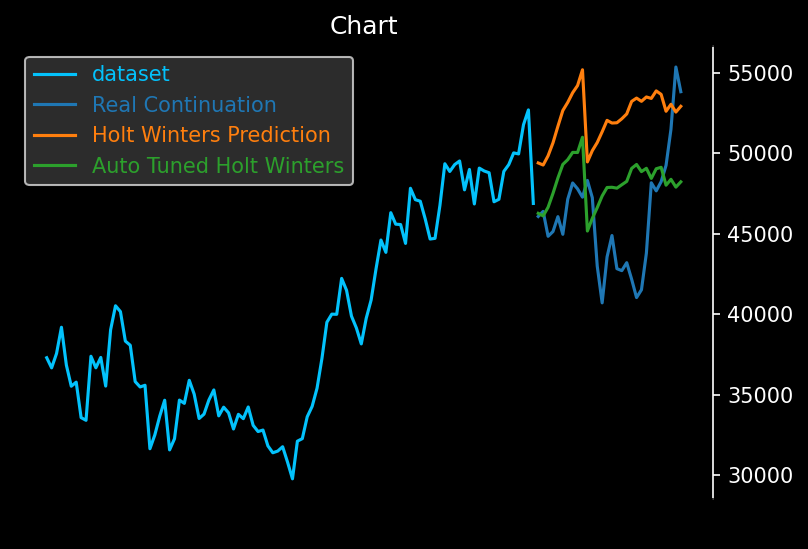

In [46]:
from chartpeer.extrapolate import hw_fit

# fit smoothing parameters by providing demanded extrapolation size and period 
# this can take a couple of seconds.
fit = hw_fit(testSet, 30, periodInIntervals=30, fitRange=[0,1])

# inject fit into new prediction
prediction_auto = hw(testSet, 30, *fit, periodInIntervals=30)

# plot again all results for comparison
plot.chart(testSet[-100:], predictionSets = {
    'Real Continuation': continuation,
    'Holt Winters Prediction': prediction,
    'Auto Tuned Holt Winters': prediction_auto
})

The auto-tuned parameters save time compared to manual fitting and most often lead to sufficient results, as shown in the chart.
In the last example the focus lies on the period dependency. For this compare different periods like 7, 14, 30.

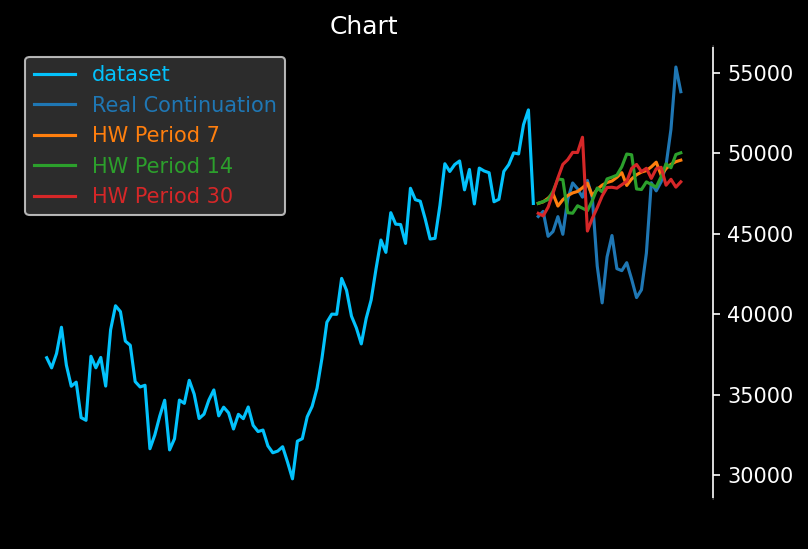

In [47]:

fit_7 = hw_fit(testSet, 30, periodInIntervals=7, fitRange=[0,1])
fit_14 = hw_fit(testSet, 30, periodInIntervals=14, fitRange=[0,1])
fit_30 = fit # known already

# create predictions
prediction_30 = hw(testSet, 30, *fit_30, periodInIntervals=30)
prediction_14 = hw(testSet, 30, *fit_14, periodInIntervals=14)
prediction_7 = hw(testSet, 30, *fit_7, periodInIntervals=7)

# plot again all results for comparison
plot.chart(testSet[-100:], predictionSets = {
    'Real Continuation': continuation,
    'HW Period 7': prediction_7,
    'HW Period 14': prediction_14,
    'HW Period 30': prediction_30,
})

Combining two HW periods with weights often makes sense for a better prediction fit as follows. Here a bias is introduced to shift the output vertically and whose value can be fitted automatically, but it can also be assumed that the bias persists throughout new generations. 

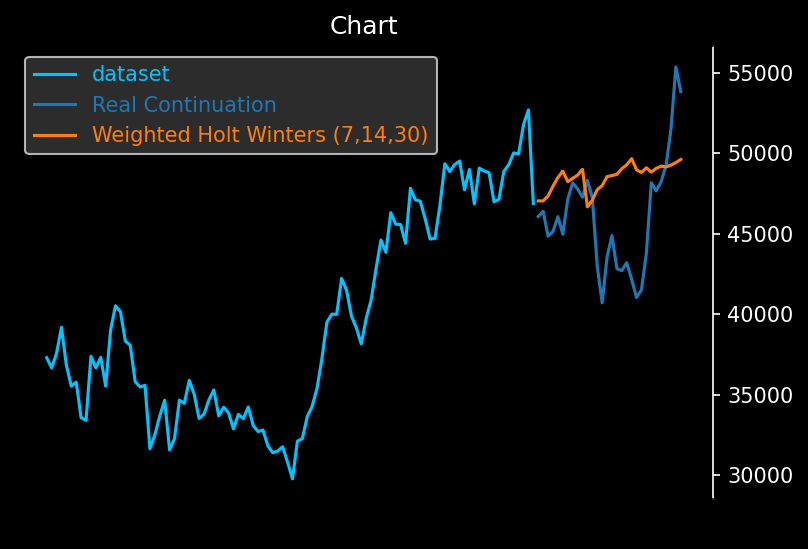

In [48]:
weight_7 = 0.2
weight_14 = 0.4
weight_30 = 0.4
bias = 400

weightedPrediction = weight_7 * prediction_7 + weight_14 * prediction_14 + weight_30 * prediction_30 + bias

# plot the weighted prediction
plot.chart(testSet[-100:], predictionSets = {
    'Real Continuation': continuation,
    'Weighted Holt Winters (7,14,30)': weightedPrediction
})


## extrapolate.gbm

Geometric Brownian motion, a Monte Carlo method for sampling new random values according to a gaussian or intrinsic distribution model of returns obtained from the given dataset. New values are generated with an inversion sampling algorithm, the process has a Markov property.

In [1]:
from chartpeer.extrapolate import gbm

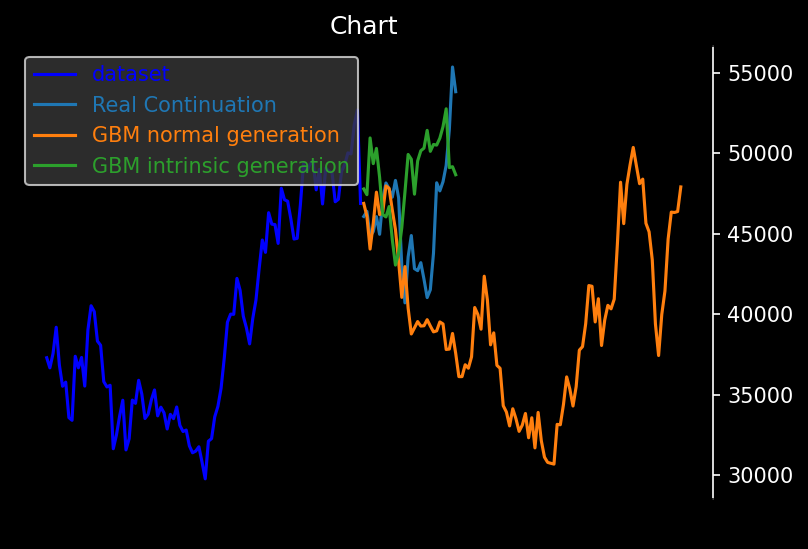

In [5]:
# from tools.extrapolate import gbm

normal = gbm(testSet, 30, 100, sampling='normal')
intrinsic = gbm(testSet, 30, 100, sampling='intrinsic')

# plot the weighted prediction
plot.chart(testSet[-100:], predictionSets = {
    'Real Continuation': continuation,
    'GBM normal generation': normal[0],
    'GBM intrinsic generation': intrinsic[0]
})

Every Monte Carlo generation will be random, but sampled from the intrinsic return distribution (either measured intrinsically or modelled with a standard normal). This method is used to map the usecase of an "intrinsic" (as possible) prediction demand based on historic price data purely. So the most pragmatic way is to simulate the prediction period (e.g. all 30 days) with respect to the underlying statistic. The full period can be simulated a large number of times which creates generation arrays. From these arrays we can then ask questions, for instance what the likelihood is that a specific price line is touched by counting those generations which crossed the price and deviding by the total number. This is almost-likely going to estimate the intrinsic probability of that event (weak law of large numbers limit).

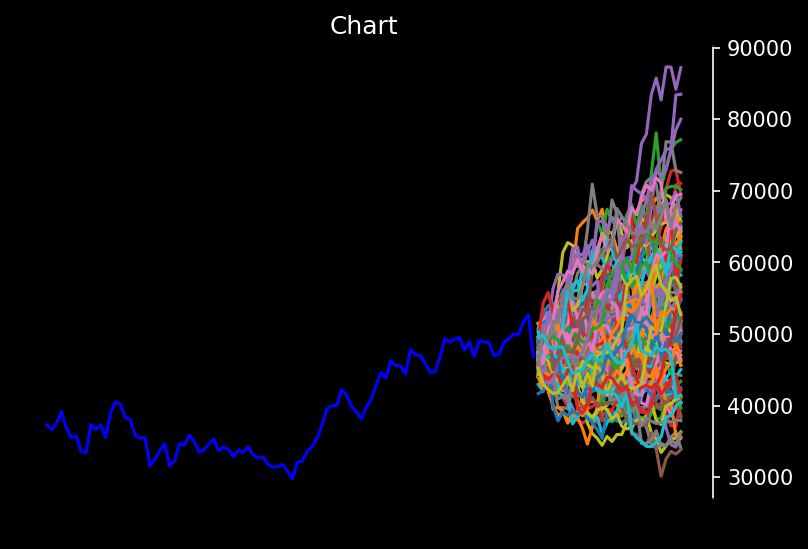

In [6]:
generations_array = {}
id = 0
for g in intrinsic:
    generations_array[str(id)] = g
    id += 1

# plot all MC generations at once
plot.chart(testSet[-100:], predictionSets=generations_array, renderLegend=False)

A probability calculation can be performed by selection rules, for instance iterate through every generation and check if a limit is reached. Note that the standard error $\frac{1}{\sqrt{N}}$ factors into the mean and variance measurement, hence for 100 generations the probablity expectation might vary for $10\%$.

In [ ]:
startPrice = testSet[-1]
_return = 0.05 # 2% positive return
count = 0
for g in intrinsic:
    for v in g:
        if v >= (1+_return)*startPrice:
            count += 1
            break

likelihood = count/len(intrinsic)
print(f'Likelihood for {_return*100}% return in 30 days:', likelihood)

In [8]:
def gbmStats (gbm, limitPrice, stopPrice):
    
    w, l = 0, 0
    for g in gbm:
        for i in range(1,len(g)):
            if g[i] >= limitPrice and g[i-1] < limitPrice or g[i] <= limitPrice and g[i-1] > limitPrice:
                w += 1
                break
            elif g[i] >= stopPrice and g[i-1] < stopPrice or g[i] <= stopPrice and g[i-1] > stopPrice:
                l += 1
                break
    return {
        'limit': w/len(gbm),
        'stop': l/len(gbm),
        'std_err': 1/np.sqrt(len(gbm))
    }

In [9]:
# compute the likelihoods of reaching a limit price and stop price, 
# the standard error depends indirectly on the number of generations 
gbmStats(intrinsic, 18000, 15000)

{'limit': 0.0, 'stop': 0.0, 'std_err': 0.1}

## extrapolate.lstm

A from-scratch long short term memory (LSTM) neural network API, for "out-of-the-box" predictions.This RNN learns sequential patterns right on the spot and gives decent results with only limited amount of data points. Every prediction returns a 1d timeseries array and the loss (mean squared error). If a loss of ~1% or less is reached the predictions can be expected to have fitted the data sufficient enough to determine pattern behaviour, then the prediction can be seen as trust-worthy (within the loss tolerance) but not guaranteed due to off-the-chart events.


- Hyper parameters can be provided via arguments

In [23]:
from chartpeer.extrapolate import lstm

# initialize an LSTM network which predicts 14 days based on last 60 days
#predictor = lstm(sequence_length=60, feature_length=14, epochs=20, batch_size=10)

prediction = predictor.predict(testSet)

Epoch 1/20
27/27 [==============================] - 3s 26ms/step - loss: 0.0553
Epoch 2/20
27/27 [==============================] - 1s 26ms/step - loss: 0.0201
Epoch 3/20
27/27 [==============================] - 1s 26ms/step - loss: 0.0190
Epoch 4/20
27/27 [==============================] - 1s 25ms/step - loss: 0.0182
Epoch 5/20
27/27 [==============================] - 1s 26ms/step - loss: 0.0245
Epoch 6/20
27/27 [==============================] - 1s 25ms/step - loss: 0.0160
Epoch 7/20
27/27 [==============================] - 1s 25ms/step - loss: 0.0156
Epoch 8/20
27/27 [==============================] - 1s 25ms/step - loss: 0.0147
Epoch 9/20
27/27 [==============================] - 1s 25ms/step - loss: 0.0139
Epoch 10/20
27/27 [==============================] - 1s 26ms/step - loss: 0.0136
Epoch 11/20
27/27 [==============================] - 1s 26ms/step - loss: 0.0132
Epoch 12/20
27/27 [==============================] - 1s 26ms/step - loss: 0.0137
Epoch 13/20
27/27 [==================

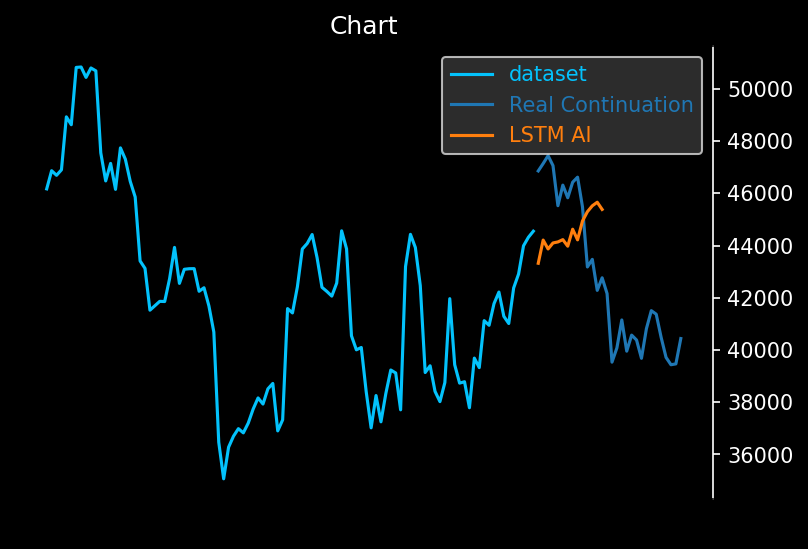

In [24]:
# plot the weighted prediction
plot.chart(testSet[-100:], predictionSets = {
    'Real Continuation': continuation,
    'LSTM AI': prediction['prediction'],
})